In [4]:
import open3d as o3d
import numpy as np
import copy
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils import get_img_simple

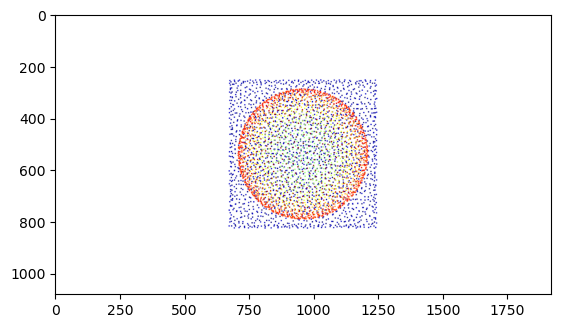

In [5]:
#create box

sphere_mesh = o3d.geometry.TriangleMesh.create_sphere()
box_mesh = o3d.geometry.TriangleMesh.create_box(4, 4, 0.3)
sphere_pcd = sphere_mesh.sample_points_poisson_disk(number_of_points=2000, init_factor=5)
box_pcd = box_mesh.sample_points_poisson_disk(number_of_points=2000, init_factor=5)
box_pcd.translate((-2, -2, -3))

pcd = box_pcd + sphere_pcd
plt.imshow(get_img_simple([pcd]))
o3d.visualization.draw_geometries([pcd])

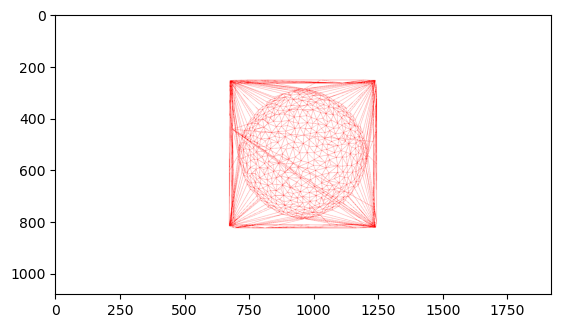

In [6]:
hull, _ = pcd.compute_convex_hull()
hull.compute_vertex_normals()
hull_lines = o3d.geometry.LineSet.create_from_triangle_mesh(hull)
hull_lines.paint_uniform_color((1, 0, 0))
o3d.visualization.draw_geometries([hull_lines])
plt.imshow(get_img_simple([hull_lines]))


Loop over all triangles and gather all front-facing triangles (inefficient but ok for now).
If the dot product of the vector from the camera to the triangle and the triangle normal is negative, the triangle is facing the camera. We will then add the triangle to a list of visible triangles.
After this, we can use these triangles to construct a new mesh, which will be the visible part of the mesh.

In [7]:
mesh = copy.deepcopy(hull)
cam_pos = np.asarray([0, 0, 3.8375305746948714])

visible_points = []

triangles = np.asarray(mesh.triangles)
triangle_normals = np.asarray(mesh.triangle_normals)
for triangle, normal in zip(triangles, triangle_normals):
    vertices = [mesh.vertices[index] for index in triangle]
    triangle_pos = sum(vertices)/3
    cam_triangle_vec = triangle_pos-cam_pos
    result = np.dot(normal, cam_triangle_vec)
    if result < 0:
        visible_points.append(vertices[0])
        visible_points.append(vertices[1])
        visible_points.append(vertices[2])


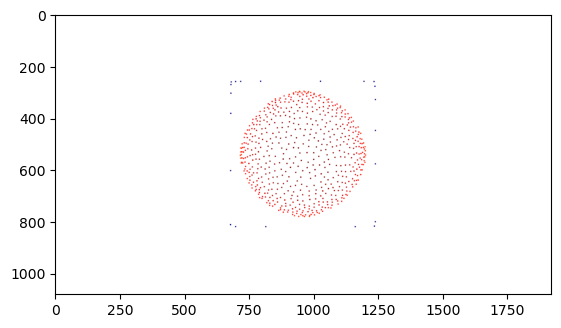

In [10]:
visible_points = np.asarray(visible_points)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(visible_points)
o3d.visualization.draw_geometries([pcd])
plt.imshow(get_img_simple([pcd]))